In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, classification_report
import seaborn as sns


In [11]:
df = pd.read_csv('student_lifestyle_cleaned.csv')
df.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,6.9,3.8,8.7,2.8,1.8,2.99,1
1,5.3,3.5,8.0,4.2,3.0,2.75,0
2,5.1,3.9,9.2,1.2,4.6,2.67,0
3,6.5,2.1,7.2,1.7,6.5,2.88,1
4,8.1,0.6,6.5,2.2,6.6,3.51,2


Before Smote:



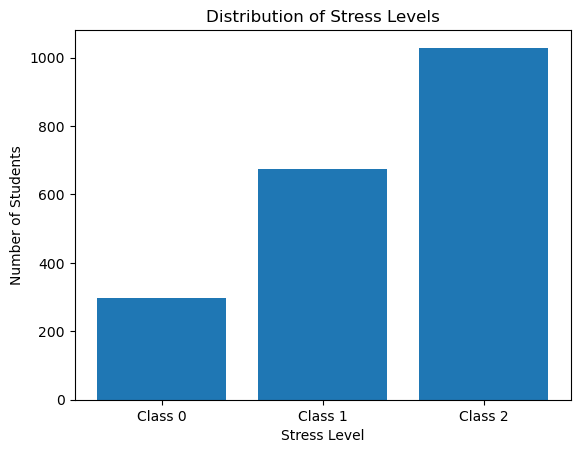

In [20]:
print("Before Smote:\n")
count_class = y.value_counts()
plt.bar(count_class.index, count_class.values)
plt.xlabel('Stress Level')
plt.ylabel('Number of Students')
plt.title('Distribution of Stress Levels')
plt.xticks(count_class.index, ['Class 2', 'Class 1', 'Class 0'])
plt.show()

In [13]:
X = df.drop('Stress_Level', axis=1)
y = df['Stress_Level']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


After Smote:



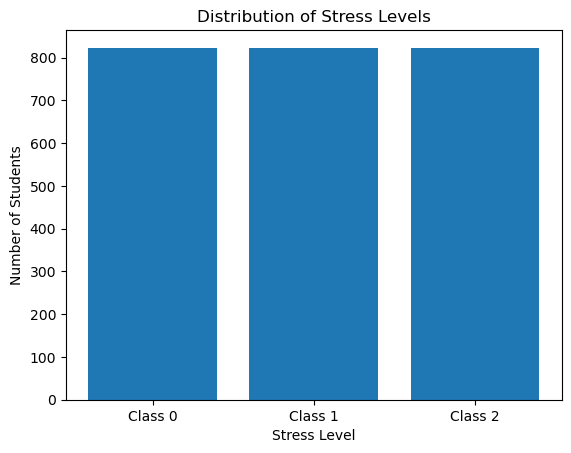

In [21]:
print("After Smote:\n")
count_class = y_train_resampled.value_counts()
plt.bar(count_class.index, count_class.values)
plt.xlabel('Stress Level')
plt.ylabel('Number of Students')
plt.title('Distribution of Stress Levels')
plt.xticks(count_class.index, ['Class 2', 'Class 1', 'Class 0'])
plt.show()

In [3]:
dt = pd.read_csv('student_lifestyle_smote.csv')
dt.head()
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Study_Hours_Per_Day              2000 non-null   float64
 1   Extracurricular_Hours_Per_Day    2000 non-null   float64
 2   Sleep_Hours_Per_Day              2000 non-null   float64
 3   Social_Hours_Per_Day             2000 non-null   float64
 4   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 5   GPA                              2000 non-null   float64
 6   Stress_Level                     2000 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 109.5 KB
